# アイスクリーム統計学 with Python 第4章

第８回講義（2017年10月24日講義、10月27日課題提出締切）

このページは、<a href="http://kogolab.chillout.jp/elearn/icecream/index.html" target="_blank">アイスクリーム統計学にようこそ！</a>の内容をプログラミング言語 Python に合わせて書き直したものです（著作権者の許諾を得て利用しております）。

<h1 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap4/sec0.html" target="_blank">第４章 単回帰</a></h1>

<P class="photo"><img src="image/icecream.jpg" width="172" height="179"></P>
<P>さて、アイ子ちゃんがバイトをしている店も、開店してから間もなく一年を迎えようとしていました。</P>
<P>店長もだんだんと店長らしくなってきました。</P>
<P class="photo"><img src="image/tencho-futsu.jpg" width="130" height="145"></P>
<P class=speech>「さあ、間もなく暑い夏がやってくるぞ」</P>
<P class=speech>───店長、何を張り切っているんですか？</P>
<P class=speech>「暑い夏はアイスクリームの季節じゃないか。燃えてくるぜ～」</P>
<P class=speech>───そうですね。私たちにとっては忙しいシーズンですね。</P>
<P class=speech>「お客の数も増えるだろうから、今からバイトの手配をしておかなくては」</P>
<P class=speech>───はい。</P>
<P class=speech>「さて、でもどれくらいのお客が来るのかな……」</P>

<h2 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap4/sec1.html" target="_blank">4.1　散布図に線を引く</a></h2>

<P class="photo"><img src="image/tencho-komaru.jpg" width="126" height="139"></P>
<P class="speech">「お客の数をうまく予測することが、バイトを手配するためには必要だな」</P>
<P class="speech">───以前、お客の数は、その日の最高気温と相関が強いといってませんでしたか？</P>
<P class="speech">「おお、そうだ。天気予報でその日の最高気温が予測できれば、それにしたがってお客の数も予測できるぞ」</P>
<P class="speech">───そういうことですね。</P>
<P class="speech">「アイ子ちゃん、ここに去年の夏のデータがある。土日は除いた平日のデータだ」</P>

<P class="photo"><img src="image/aiko-futsu.jpg" width="168" height="140"></P>
<P class="speech">───はい、散布図ですね。</P>
<P class="speech">さすが。</P>
<P class="speech">───ちょちょいのちょいです。</P>

<h4 style="padding: 0.25em 0.5em;color: #494949;background: transparent;border-left: solid 5px #7db4e6;">課題4.1</h4>

[去年の夏のデータ](https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/ice_cream2.txt)をダウンロードし、散布図を描いてください。

In [1]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
# import urllib # Python 2 の場合
import urllib.request # Python 3 の場合

In [2]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/ice_cream2.txt'

In [3]:
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'ice_cream2.txt') # Python 2 の場合
urllib.request.urlretrieve(url, 'ice_cream2.txt') # Python 3 の場合

('ice_cream2.txt', <http.client.HTTPMessage at 0x104914a58>)

In [4]:
# ダウンロードしたデータから、列ごとに数字を読み込んでリストに格納する。
col1 = []
col2 = []
col3 = []
for i, line in enumerate(open('ice_cream2.txt')):
    if i == 0:
        continue
    a = line.split()
    col1.append(int(a[0]))
    col2.append(int(a[1]))
    col3.append(int(a[2]))

In [5]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline

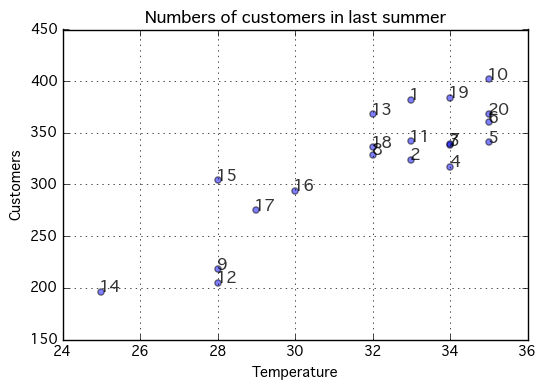

In [6]:
# プロットする
plt.scatter(col2, col3, alpha=0.5)
plt.title("Numbers of customers in last summer")
plt.xlabel("Temperature")
plt.ylabel("Customers")
for day, x, y in zip(col1, col2, col3):
    plt.text(x, y, day, alpha=0.8, size=12)
plt.grid()
plt.show()

<P class="speech">───はい、できましたよ。散布図です。</P>
<P class="speech">「うーん、確かに右上がりの散布図だけど……なんかぼんやりしているな」</P>
<P class="speech">───店長、それはしかたないですよ。データに分散があるのですから。</P>
<P class="speech">「こう、なんというか、すぱーっと線でも引いてくれないかな。この線をみれば、予測客数が一発でわかります、みたいな線。そうだなこんな線」</P>
<P class="photo"><img src="image/sanpuzu2.jpg" width="356" height="292"></P>
<P class="speech">───確かにそんな線が引ければ、予測人数も計算しやすいわね。でも、かといって、目分量で引くわけにもいかないし……　どうしたらいいのかな？</P>
<P class="photo"><img src="image/aiko-fushigi.jpg" width="148" height="128"></P>


<h2 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap4/sec2.html" target="_blank">4.2　回帰直線の原理</a></h2>

<P class="photo"><img src="image/senpai-futsu.jpg" width="152" height="127"></P>
<P class="speech">「どうしました？　店長、アイ子ちゃん。難しい顔をして」</P>
<P class="speech">───あ、三ヶ島先輩。この散布図を見てください。</P>
<P class="speech">「右上がり。正の相関だね」</P>
<P class="speech">───そうなんです。そこまではいいんですが、これに、すぱーっと線を引きたいんですよ。最高気温がわかれば、客の数がすぐに計算できるような線です。</P>
<P class="speech">「ふむふむ。まさに、それは、＜回帰直線＞と呼ばれているものなんだよ」</P>
<P class="photo"><img src="image/aiko-ganbaru.jpg" width="181" height="133"></P>
<P class="speech">───怪奇直線ですか？　なんだか恐ろしげですね。</P>
<P class="speech">「いやいや、怪奇現象の怪奇じゃなくて、回って帰ると書いて＜回帰＞だ。妙なギャグかまさないように」</P>
<P class="speech">───てへ。三ヶ島先輩、その回帰直線というのを、教えてください。</P>

<h4 style="border-bottom: solid 1px black;">回帰直線の原理</h4>

<p class="photo"><img src="image/senpai-setsumei.jpg" width="135" height="136"></p>
<p>説明のために、4つだけのデータの場合を考えていこう。このようなデータだ。</p>
<p class="photo"><img src="image/kaiki1.jpg" width="236" height="242"></p>
<p>この4つの点をうまく通るような直線を引こうと考える。こんな感じだね。</p>
<p class="photo"><img src="image/kaiki2.jpg" width="239" height="241"></p>
<p>でも、どううまく直線を引いたとしても、どうしてもその直線と実際のデータは少しずれるわけだ。全部のデータがすべて直線の上に乗っていない限りね。そこで、直線と実際のデータの「ずれ」を考える。</p>
<p>下の図の、オレンジとブルーの矢印のように、プラスとマイナスのずれがある。これを「<em>残差</em>」と呼ぼう。「残差」というのは、つまり、直線で予測できるデータの残りの部分ということだ。</p>
<p class="photo"><img src="image/kaiki3.jpg" width="238" height="238"></p>
<p>さて、この残差が最も小さくなるような直線を考える。これを<em>「回帰直線」</em>と呼ぶ。</p>
<p>この回帰直線を求める方法として「最小２乗法」というものを使う。これは、残差の２乗の合計を計算して、それを最も小さくする直線を求めるものだ。</p>
<p class="photo"><img src="image/kaiki4.jpg" width="440" height="241"></p>
<p>下の図を見て、残差の２乗和が小さいケースと大きいケースを比較してみよう。残差の２乗は、残差を一辺とする正方形の面積に相当するので、小さい値がそろっている方が、合計値は小さくなる。下の図で、その大きさに注目してみよう。</p>
<p class="photo"><img src="image/kaiki5.jpg" width="598" height="281"></p>



<h2 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap4/sec3.html" target="_blank">4.3　回帰直線を求める</a></h2>

<P class="photo"><img src="image/aiko-futsu.jpg" width="168" height="140"></P>
<P class="speech">───回帰直線の原理はわかりました、三ヶ島先輩。具体的にその直線を計算で求めるにはどうしたらいいんですか？</P>
<P class="speech">「うん。直線というのは、何を指定すれば決まると思う？」</P>
<P class="speech">───あー、中学校でやりましたね。ええと、「y切片」と「傾き」だったかな？</P>
<P class="speech">「そうだ。図で描くとこんな感じ」</P>
<P class="photo"><img src="image/kaiki6.jpg" width="318" height="277"></P>
<P class="speech">「y切片というのは、xがゼロの時のyの値だ。傾きというのは、x方向に1だけ進んだとき、y方向にいくつ進んだかという値だ。思い出したかな？」</P>
<P class="speech">───じゃあ、最小２乗法によって、直線のy切片と傾きを決めれば、回帰直線が決まるというわけですね。</P>
<P class="speech">「そう。その通りだ」</P>
<P class="speech">───具体的には、どうやって求めるんですか？</P>
<P class="speech">「それには、偏微分の知識が必要だ」</P>
<P class="photo"><img src="image/aiko-asekaki.jpg" width="194" height="150"></P>
<P class="speech">───偏微分？　微分積分さえ習ってませんので、かんべんしてください。</P>
<P class="speech">「じゃ、計算の仕方だけ教えるね。意外と簡単だよ」</P>

<h4 style="border-bottom: solid 1px black;">回帰直線を求める</h4>
<p class="photo"><img src="image/senpai-setsumei.jpg" width="135" height="136"></p>
<p>まず、回帰直線の傾きだ。</p>
<p>相関係数の出し方はもうわかっているよね。そうすると、</p>
<p class="eq">回帰直線の傾き＝相関係数＊（（yの標準偏差）／（xの標準偏差））</p>
<p>となる。ここで「＊」はかけ算、「／」はわり算の記号だよ。</p>
<p>イメージにするとこんな感じだよ。</p>
<p class="photo"><img src="image/kaiki7.jpg" width="691" height="270"></p>
<p>次に、y切片だ。</p>
<p class="eq">y切片＝yの平均－（傾き＊xの平均）</p>
<p>となる。</p>
<p>これもイメージにしてみよう。こんな感じ。</p>
<p class="photo"><img src="image/kaiki8.jpg" width="525" height="276"></p>

<h2 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap4/sec4.html" target="_blank">4.4　回帰直線を求めてみよう</a></h2>

<P class="photo"><img src="image/aiko-fushigi.jpg" width="148" height="128"></P>
<P>じゃあ、最高気温(x)と客数(y)のデータを使って、回帰直線をもとめてみます。</P>

<h4 style="padding: 0.25em 0.5em;color: #494949;background: transparent;border-left: solid 5px #7db4e6;">課題4.4</h4>

[去年の夏のデータ](https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/ice_cream2.txt)をダウンロードし、以下の問に答えてください。

(1)　相関係数を求めてください。
    * 相関係数＝偏差積の平均／（xの標準偏差＊yの標準偏差）

(2)　回帰直線の傾きを求めてください。
    * 回帰直線の傾き＝相関係数＊（（yの標準偏差）／（xの標準偏差））

(3)　回帰直線のy切片を求めてください。

(4)　散布図に回帰直線を描き入れてください。

In [7]:
# 平均値を求める関数
def average(list):
    sum = 0
    for x in list:
        sum += x
    return sum / len(list)

In [8]:
# 分散を求める関数
def variance(list):
    ave = average(list)
    sum = 0
    for x in list:
        sum += (x - ave) ** 2
    return sum / len(list)

In [9]:
# 標準偏差を求める関数
import math
def standard_deviation(list):
    return math.sqrt(variance(list))

In [10]:
# 共分散 = 偏差積の平均 （偏差値、ではありません。偏差積、です）
def covariance(list1, list2): 
    ave1 = average(list1)
    ave2 = average(list2)
    sum = 0
    for d1, d2 in zip(list1, list2):
        sum += (d1 - ave1) * (d2 - ave2)
    return sum / len(list1)

In [11]:
# 相関係数 = 共分散を list1, list2 の標準偏差で割ったもの
def correlation(list1, list2):
    return covariance(list1, list2) / (standard_deviation(list1) * standard_deviation(list2))

In [12]:
# 相関係数を求める
correlation(col2, col3)

0.8703518769354424

In [13]:
# 回帰直線の傾き＝相関係数＊（（yの標準偏差）／（xの標準偏差））を求める関数を作ってください。
def a_fit(xlist, ylist):
    return correlation(xlist, ylist) * standard_deviation(ylist) / standard_deviation(xlist)

In [14]:
# y切片＝yの平均－（傾き＊xの平均）を求める関数を作ってください。
def b_fit(xlist, ylist):
    return average(ylist) - a_fit(xlist, ylist) * average(xlist)

In [15]:
# 回帰直線の式を表示
a = a_fit(col2, col3)
b = b_fit(col2, col3)
print("y = ax + b; (a, b) = ({0}, {1})".format(a, b))

y = ax + b; (a, b) = (17.24825704759018, -229.9818126705062)


In [16]:
# 回帰直線の式を関数として表現
def f(x):
    return a * x + b

In [17]:
# たとえば最高気温 31度のときの予測客数は
f(31)

304.71415580478936

In [18]:
# 回帰直線を描くための準備として、回帰直線の式を参考に、xの最小値〜最大値の範囲のxに対応するyの予測値（fitted_y）を計算してください。
test_x = [min(col2) - 1, max(col2) + 1]
fitted_y = [f(test_x[0]), f(test_x[1])]

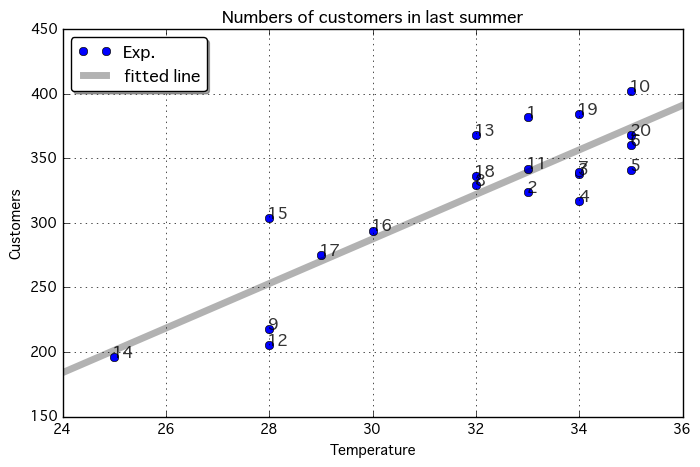

In [19]:
# 散布図と回帰直線を描く。
plt.figure(figsize=(8,5))
plt.plot(col2,col3,'bo', label='Exp.')
plt.plot(test_x,fitted_y,'k-', label='fitted line', linewidth=5, alpha=0.3)
plt.title("Numbers of customers in last summer")
plt.xlabel("Temperature")
plt.ylabel("Customers")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
for day, x, y in zip(col1, col2, col3):
    plt.text(x, y, day, alpha=0.8, size=12)
plt.show()

<p class="photo"><img src="image/aiko-suteki.jpg" width="154" height="130"></p>
<p class="speech">───三ヶ島先輩、計算できました。傾きは、17.25、y切片は、-229.98になりました。</p>
<p class="speech">「ということはどういう意味かな？　アイ子ちゃん」</p>
<p class="speech">───ええと、傾きが17.25ということは、最高気温が1度上がるごとに、お客の数が17.25人増えるということですね。</p>
<p class="speech">「うん、そうだね」</p>
<p class="speech">───そして、y切片が-229.98ということは……　え？　マイナス？</p>
<p class="speech">「それは、数字の通りに解釈すれば、こういうことだ。最高気温が0度のとき、お客の数は-229.98人と予測できる、ということ」</p>
<p class="speech">───でも、お客の数がマイナスなんておかしいじゃないですか？</p>
<p class="speech">「そうだ。おかしいよね。でも、回帰直線は計算されてしまうので、こういうことになる。最高気温0度のときのお客の数はゼロになることはあるかもしれないが、マイナスには論理的にならないね。このように数値を計算した後には、その意味づけをよく考えることが大切なんだ」</p>
<p class="speech">───いずれにしても、y切片が-229.98ということは、数値としてはおかしくないのですね。</p>
<p class="speech">「そう。おかしくない。解釈すると妙なことになるけどね」</p>
<p class="photo"><img src="image/senpai-nozoku.jpg" width="135" height="126"></p>
<p class="speech">「たとえば、夏としては割と涼しい日である、最高気温25度の日のお客の数は、どれくらいだと予測できるかな？」</p>
<p class="speech">───えーと、傾き17.25に25をかけて、y切片-229.98を足せばいいんですね。そうすると、201.27人ですね。</p>
<p class="speech">「そうなるね。実際のデータでは、14番目のデータで、最高気温25度のとき、客数196人という実績があって、だいたい合致しているようだね」</p>
<p class="speech">───ほんとだ。うーん、回帰直線って、すごいですね。</p>

<h2 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap4/sec5.html" target="_blank">4.5　（応用編）回帰直線で予測する</a></h2>

<P class="photo"><img src="image/tencho-muzukashii.jpg" width="127" height="138"></P>
<P class="speech">「アイ子ちゃん、どう～？」</P>
<P class="speech">───あ、店長。知らないうちにどこに行っていたんですか？</P>
<P class="speech">「で、どうなの。ぱしーっと線は引けたの？」</P>
<P class="speech">───はい。三ヶ島先輩のおかげでばっちりですよ。その線は、「回帰直線」というんです。</P>
<P class="speech">「なに～？　怪奇直線？　なんか怖い～」</P>
<P class="speech">───（がくっ。私は店長と同じギャグレベルなのか…）いえ、店長。回って帰ると書いて「回帰」って言うんです。これを見てください。この回帰直線を使えば、最高気温によって予測できる客数が即座に計算できます。</P>
<P class="speech">「おおっ！　すごいな回帰直線てのは」</P>

<h4 style="border-bottom: solid 1px black;">駅からの距離で客数を予測する</h4>

<p class="photo"><img src="image/tencho-futsu.jpg" width="130" height="145"></p>
<p class="speech">「アイ子ちゃん、それじゃ、店舗の駅からの距離と平均客数のデータを使って、回帰直線とやらを求めてくれないかな。本部にこのレポートを出せば、新規店舗を作ったときの客数予測に、きっと役立つに違いない」</p>

<P class="speech">───店長、このデータから回帰直線を求めてみますね。コーンも手伝って！</P>
<P class="photo"><img src="image/corn.jpg" width="120" height="91"></P>

<h4 style="padding: 0.25em 0.5em;color: #494949;background: transparent;border-left: solid 5px #7db4e6;">課題4.5</h4>

[店舗別８月の平均客数データ（12店舗）](https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/shop_distance.txt)をダウンロードし、相関係数、回帰直線の傾き、回帰直線のy切片を求め、散布図に回帰直線を描き入れてください。

In [20]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/shop_distance.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'shop_distance.txt') # Python 2 の場合
urllib.request.urlretrieve(url, 'shop_distance.txt') # Python 3 の場合

('shop_distance.txt', <http.client.HTTPMessage at 0x1083795f8>)

In [21]:
# ダウンロードしたデータから、列ごとに数字を読み込んでリストに格納する。
col1 = []
col2 = []
col3 = []
for i, line in enumerate(open('shop_distance.txt')):
    if i == 0:
        continue
    a = line.split()
    col1.append(int(a[0]))
    col2.append(int(a[1]))
    col3.append(int(a[2]))

In [22]:
# 相関係数を求める
correlation(col2, col3)

-0.9795221182977909

In [23]:
# 回帰直線の式
a = a_fit(col2, col3)
b = b_fit(col2, col3)
print("y = ax + b; (a, b) = ({0}, {1})".format(a, b))

y = ax + b; (a, b) = (-0.47614044298381675, 755.3495972099588)


In [24]:
# 回帰直線を描くための準備
test_x = [min(col2) - 1, max(col2) + 1]
fitted_y = [f(test_x[0]), f(test_x[1])]

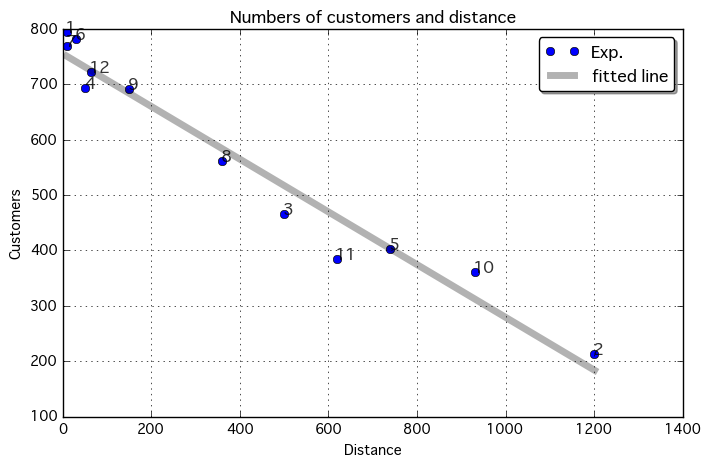

In [25]:
# 散布図と回帰直線を描く。
plt.figure(figsize=(8,5))
plt.plot(col2,col3,'bo', label='Exp.')
plt.plot(test_x,fitted_y,'k-', label='fitted line', linewidth=5, alpha=0.3)
plt.title("Numbers of customers and distance")
plt.xlabel("Distance")
plt.ylabel("Customers")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
for day, x, y in zip(col1, col2, col3):
    plt.text(x, y, day, alpha=0.8, size=12)
plt.show()

In [26]:
# 駅からの距離が 250 m の店舗で予想される客数
f(250)

636.3144864640046

<h2 STYLE="background: #c2edff;padding: 0.5em;">アイスクリーム統計学 第４章 課題</h2>

__課題4.1__、__課題4.4__、および __課題4.5__ を解いて、指定のメールアドレスまでメールしてください。メール送信後は、エラーが帰ってきてないことを確認してください（メールアドレスを間違える人がときどき居ます）。
* 締切：10月27日（今すぐでなくても結構です）
* メールタイトル：「アイスクリーム統計学 第４章」
* 学籍番号と氏名を明記すること。
* 感想などがあれば書いてくれると嬉しいです。次回以降の講義の改善につながるかも知れません。

In [27]:
# アイスクリーム統計学 第４章 課題

<h2 STYLE="background: #c2edff;padding: 0.5em;">終わったら、<a href="IceCreamStatistics05.ipynb">第５章：偏相関</a> に進んでください。</h2>
（2017年10月27日講義、10月31日課題提出締切）